In [21]:
%load_ext autoreload
%autoreload 2
import os
#%set_env PROJ_LIB=/depot/dawson29/apps/condaenv/envs/cent7/5.1.0-py27/pyPIPS/share/proj
# %set_env LD_LIBRARY_PATH=/apps/cent7/intel/compilers_and_libraries_2017.1.132/linux/compiler/lib/intel64
# %set_env LIBRARY_PATH=/apps/cent7/intel/compilers_and_libraries_2017.1.132/linux/compiler/lib/intel64
#import pyCRMtools.modules.dualpara as dualpol
#import pyPIPS.dualpara as dualpol
import numpy as np
import numpy.ma as ma
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as ticker
import matplotlib.dates as dates
from mpl_toolkits.axes_grid1 import ImageGrid,make_axes_locatable,host_subplot
from mpl_toolkits.basemap import Basemap
from datetime import datetime, timedelta
import pytz as pytz
import sys
import pyPIPS.utils as utils
import pyPIPS.thermolib as thermo
import pyPIPS.DSDlib as dsd
import pyPIPS.plotmodule as PIPSplot
import pyPIPS.simulator as sim
import pyPIPS.radarmodule as pyPIPSradar
import pyPIPS.PIPS as pips
import pyPIPS.pips_io as pips_io
import pyPIPS.parsivel_qc as pqc
import pyPIPS.parsivel_params as pp
from pyCRMtools.modules import plotmodule as plotmod
from pyCRMtools.modules import utils as CRMutils
from pyCRMtools.pycaps import arps_read
from pyCRMtools.pycaps import pycaps_fields
from pyCRMtools.pycaps import calvars_radar as radar
import pandas as pd
import xarray as xr
import glob
import numpy.random as random
from scipy.stats import gamma, uniform
from scipy.special import gamma as gammafunc
from scipy import ndimage
from metpy.plots import StationPlot
from metpy.calc import wind_components as get_wind_components
from metpy.cbook import get_test_data
from metpy.plots import StationPlot
from metpy.plots.wx_symbols import current_weather, sky_cover
from metpy.units import units
%matplotlib inline


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [22]:
plotdir = '/depot/dawson29/data/Projects/VORTEXSE/simulations/ARPS/2017_IOP4C/EnKF/PIPS/plots/CCN1000_original/'
meteogram_plotdir = os.path.join(plotdir, 'meteograms')

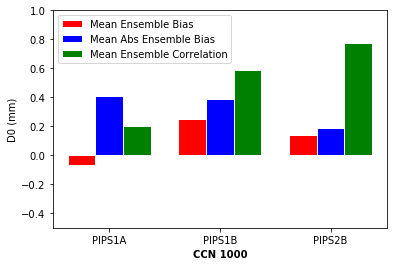

In [35]:
#D0 Bar Graph Plot for Stats CCN 1000

# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [-0.0658, 0.2537, 0.1425]
bars2 = [0.4111, 0.3893, 0.1893]
bars3 = [0.2009, 0.5859, 0.7752]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='Mean Ensemble Bias')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Mean Abs Ensemble Bias')
plt.bar(r3, bars3, color='green', width=barWidth, edgecolor='white', label='Mean Ensemble Correlation')
 
# Add xticks on the middle of the group bars
plt.ylim(-0.50,1)
plt.xlabel('CCN 1000', fontweight='bold')
plt.ylabel('D0 (mm)')
plt.xticks([r + barWidth for r in range(len(bars1))], ['PIPS1A', 'PIPS1B', 'PIPS2B'])
 
# Create legend & Show graphic
plt.legend()

figname = 'CCN1000_D0_stats_bar_graph.png'
figpath = os.path.join(meteogram_plotdir, figname)
plt.savefig(figpath, dpi=300, bbox_inches='tight')
plt.show()

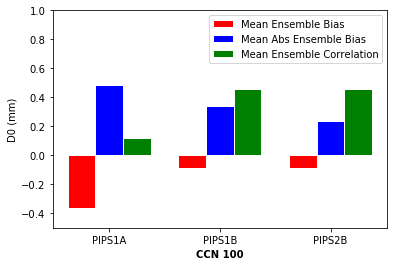

In [34]:
#D0 Bar Graph Plot for Stats CCN 100

# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [-0.3655, -0.0906, -0.0849]
bars2 = [0.4849, 0.3382, 0.2396]
bars3 = [0.1176, 0.4607, 0.4593]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='Mean Ensemble Bias')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Mean Abs Ensemble Bias')
plt.bar(r3, bars3, color='green', width=barWidth, edgecolor='white', label='Mean Ensemble Correlation')
 
# Add xticks on the middle of the group bars
plt.ylim(-0.50,1)
plt.xlabel('CCN 100', fontweight='bold')
plt.ylabel('D0 (mm)')
plt.xticks([r + barWidth for r in range(len(bars1))], ['PIPS1A', 'PIPS1B', 'PIPS2B'])
 
# Create legend & Show graphic
plt.legend()

figname = 'CCN100_D0_stats_bar_graph.png'
figpath = os.path.join(meteogram_plotdir, figname)
plt.savefig(figpath, dpi=300, bbox_inches='tight')
plt.show()

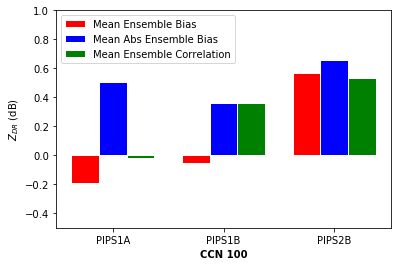

In [44]:
#Zdr Bar Graph Plot for Stats CCN 1000

# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [-0.1920, -0.0539, 0.5705]
bars2 = [0.5062, 0.3612, 0.6562]
bars3 = [-0.0200, 0.3601, 0.5300]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='Mean Ensemble Bias')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Mean Abs Ensemble Bias')
plt.bar(r3, bars3, color='green', width=barWidth, edgecolor='white', label='Mean Ensemble Correlation')
 
# Add xticks on the middle of the group bars
plt.ylim(-0.50,1)
plt.xlabel('CCN 100', fontweight='bold')
plt.ylabel('$Z_{DR}$ (dB)')
plt.xticks([r + barWidth for r in range(len(bars1))], ['PIPS1A', 'PIPS1B', 'PIPS2B'])
 
# Create legend & Show graphic
plt.legend()

figname = 'CCN100_Zdr_stats_bar_graph.png'
figpath = os.path.join(meteogram_plotdir, figname)
plt.savefig(figpath, dpi=300, bbox_inches='tight')
plt.show()

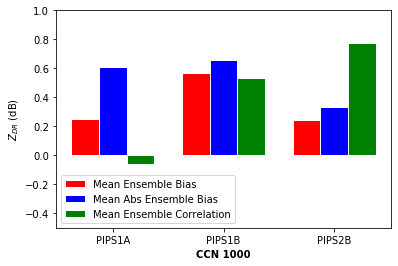

In [53]:
#Zdr Bar Graph Plot for Stats CCN 1000

# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [0.2532, 0.5707, 0.2463]
bars2 = [0.6115, 0.6562, 0.3316]
bars3 = [-0.0565, 0.5300, 0.7718]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='Mean Ensemble Bias')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Mean Abs Ensemble Bias')
plt.bar(r3, bars3, color='green', width=barWidth, edgecolor='white', label='Mean Ensemble Correlation')
 
# Add xticks on the middle of the group bars
plt.ylim(-0.50,1)
plt.xlabel('CCN 1000', fontweight='bold')
plt.ylabel('$Z_{DR}$ (dB)')
plt.xticks([r + barWidth for r in range(len(bars1))], ['PIPS1A', 'PIPS1B', 'PIPS2B'])
 
# Create legend & Show graphic
plt.legend(loc='best')

figname = 'CCN1000_Zdr_stats_bar_graph.png'
figpath = os.path.join(meteogram_plotdir, figname)
plt.savefig(figpath, dpi=300, bbox_inches='tight')
plt.show()

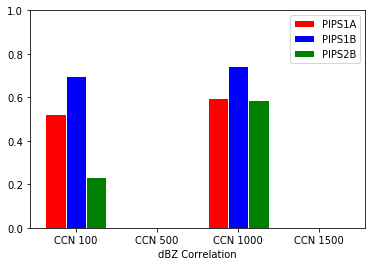

In [82]:
#dBZ Bar Graph Plot for Stats CCN 1000

# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [0.5216, 0.000, 0.5972,0.00]
bars2 = [0.6970, 0.0, 0.7462,0.00]
bars3 = [0.2352, 0.00, 0.5888,0.00]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='PIPS1A')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='PIPS1B')
plt.bar(r3, bars3, color='green', width=barWidth, edgecolor='white', label='PIPS2B')
 
# Add xticks on the middle of the group bars
plt.ylim(0,1)
plt.xlabel('dBZ Correlation')
#plt.ylabel('$dBZ$')
plt.xticks([r + barWidth for r in range(len(bars1))], ['CCN 100', 'CCN 500', 'CCN 1000', 'CCN 1500'])
 
# Create legend & Show graphic
plt.legend(loc='best')

figname = 'dBZ_stats_CC_bar_graph.png'
figpath = os.path.join(meteogram_plotdir, figname)
plt.savefig(figpath, dpi=300, bbox_inches='tight')
plt.show()

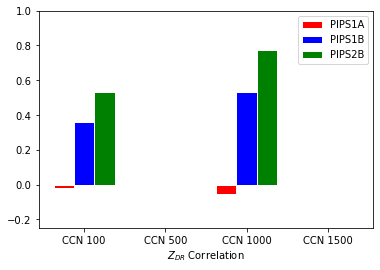

In [83]:
#Zdr Bar Graph Plot for CC CCN 1000

# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [-0.02, 0.000, -0.0565,0.00]
bars2 = [0.3601, 0.0, 0.5300,0.00]
bars3 = [0.5300, 0.00, 0.7718,0.00]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='PIPS1A')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='PIPS1B')
plt.bar(r3, bars3, color='green', width=barWidth, edgecolor='white', label='PIPS2B')
 
# Add xticks on the middle of the group bars
plt.ylim(-0.25,1)
plt.xlabel('$Z_{DR}$ Correlation')
#plt.ylabel('$dBZ$')
plt.xticks([r + barWidth for r in range(len(bars1))], ['CCN 100', 'CCN 500', 'CCN 1000', 'CCN 1500'])
 
# Create legend & Show graphic
plt.legend(loc='best')

figname = 'Zdr_stats_CC_bar_graph.png'
figpath = os.path.join(meteogram_plotdir, figname)
plt.savefig(figpath, dpi=300, bbox_inches='tight')
plt.show()

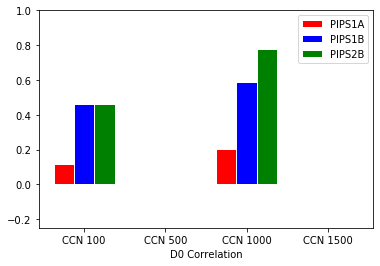

In [84]:
#D0 Bar Graph Plot for CC CCN 1000

# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [0.1176, 0.000, 0.2009,0.00]
bars2 = [0.4607, 0.0, 0.5859,0.00]
bars3 = [0.4593, 0.00, 0.7752,0.00]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='PIPS1A')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='PIPS1B')
plt.bar(r3, bars3, color='green', width=barWidth, edgecolor='white', label='PIPS2B')
 
# Add xticks on the middle of the group bars
plt.ylim(-0.25,1)
plt.xlabel('D0 Correlation')
#plt.ylabel('$dBZ$')
plt.xticks([r + barWidth for r in range(len(bars1))], ['CCN 100', 'CCN 500', 'CCN 1000', 'CCN 1500'])
 
# Create legend & Show graphic
plt.legend(loc='best')

figname = 'D0_stats_CC_bar_graph.png'
figpath = os.path.join(meteogram_plotdir, figname)
plt.savefig(figpath, dpi=300, bbox_inches='tight')
plt.show()

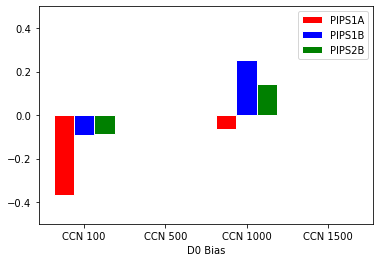

In [86]:
#D0 Bar Graph Plot for bias CCN 1000

# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [-0.3655, 0.000, -0.0658,0.00]
bars2 = [-0.0906, 0.0, 0.2537,0.00]
bars3 = [-0.0849, 0.00, 0.1425,0.00]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='PIPS1A')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='PIPS1B')
plt.bar(r3, bars3, color='green', width=barWidth, edgecolor='white', label='PIPS2B')
 
# Add xticks on the middle of the group bars
plt.ylim(-0.5,0.5)
plt.xlabel('D0 Bias')
#plt.ylabel('$dBZ$')
plt.xticks([r + barWidth for r in range(len(bars1))], ['CCN 100', 'CCN 500', 'CCN 1000', 'CCN 1500'])
 
# Create legend & Show graphic
plt.legend(loc='best')

figname = 'D0_stats_bias_bar_graph.png'
figpath = os.path.join(meteogram_plotdir, figname)
plt.savefig(figpath, dpi=300, bbox_inches='tight')
plt.show()

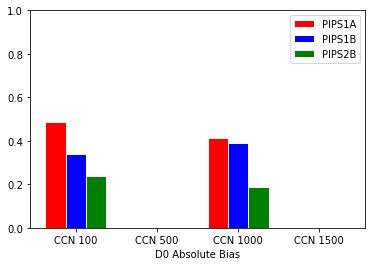

In [89]:
#D0 Bar Graph Plot for abs bias CCN 1000

# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [0.4849, 0.000, 0.4111,0.00]
bars2 = [0.3382, 0.0, 0.3893,0.00]
bars3 = [0.2396, 0.00, 0.1893,0.00]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='PIPS1A')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='PIPS1B')
plt.bar(r3, bars3, color='green', width=barWidth, edgecolor='white', label='PIPS2B')
 
# Add xticks on the middle of the group bars
plt.ylim(0,1.0)
plt.xlabel('D0 Absolute Bias')
#plt.ylabel('$dBZ$')
plt.xticks([r + barWidth for r in range(len(bars1))], ['CCN 100', 'CCN 500', 'CCN 1000', 'CCN 1500'])
 
# Create legend & Show graphic
plt.legend(loc='best')

figname = 'D0_stats_abs_bias_bar_graph.png'
figpath = os.path.join(meteogram_plotdir, figname)
plt.savefig(figpath, dpi=300, bbox_inches='tight')
plt.show()

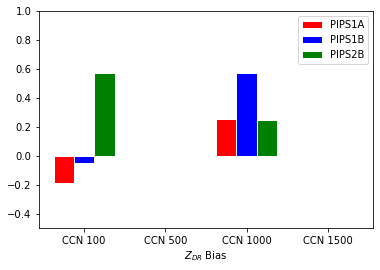

In [97]:
#Zdr Bar Graph Plot for bias CCN 1000

# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [-0.1920, 0.000, 0.2532,0.00]
bars2 = [-0.0539, 0.0, 0.5707,0.00]
bars3 = [0.5705, 0.00, 0.2463,0.00]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='PIPS1A')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='PIPS1B')
plt.bar(r3, bars3, color='green', width=barWidth, edgecolor='white', label='PIPS2B')
 
# Add xticks on the middle of the group bars
plt.ylim(-0.5,1.0)
plt.xlabel('$Z_{DR}$ Bias')
#plt.ylabel('$dBZ$')
plt.xticks([r + barWidth for r in range(len(bars1))], ['CCN 100', 'CCN 500', 'CCN 1000', 'CCN 1500'])
 
# Create legend & Show graphic
plt.legend(loc='best')

figname = 'Zdr_stats_bias_bar_graph.png'
figpath = os.path.join(meteogram_plotdir, figname)
plt.savefig(figpath, dpi=300, bbox_inches='tight')
plt.show()

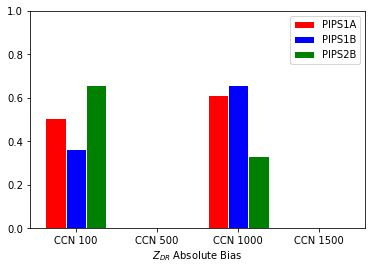

In [98]:
#Zdr Bar Graph Plot for abs bias CCN 1000

# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [0.5062, 0.000, 0.6115,0.00]
bars2 = [0.3612, 0.0, 0.6562,0.00]
bars3 = [0.6562, 0.00, 0.3316,0.00]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='PIPS1A')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='PIPS1B')
plt.bar(r3, bars3, color='green', width=barWidth, edgecolor='white', label='PIPS2B')
 
# Add xticks on the middle of the group bars
plt.ylim(0.00,1.0)
plt.xlabel('$Z_{DR}$ Absolute Bias')
#plt.ylabel('$dBZ$')
plt.xticks([r + barWidth for r in range(len(bars1))], ['CCN 100', 'CCN 500', 'CCN 1000', 'CCN 1500'])
 
# Create legend & Show graphic
plt.legend(loc='best')

figname = 'Zdr_stats_abs_bias_bar_graph.png'
figpath = os.path.join(meteogram_plotdir, figname)
plt.savefig(figpath, dpi=300, bbox_inches='tight')
plt.show()